<a href="https://colab.research.google.com/github/arjunparmar/IPL-2020/blob/master/Himanshu/Model/Model_Train_and_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd

In [120]:
data = pd.read_csv("final_08-19.csv")

In [121]:
data.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner,id,result,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,umpire3,venue
0,KKR,RCB,RCB,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,away,home,KKR,60,normal,field,0,140,0,BB McCullum,Asad Rauf,RE Koertzen,NaN,M Chinnaswamy Stadium
1,CSK,KXIP,CSK,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,away,away,CSK,61,normal,bat,0,33,0,MEK Hussey,MR Benson,SL Shastri,NaN,"Punjab Cricket Association Stadium, Mohali"
2,RR,DC,RR,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,away,away,DC,62,normal,bat,0,0,9,MF Maharoof,Aleem Dar,GA Pratapkumar,NaN,Feroz Shah Kotla
3,MI,RCB,MI,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,home,away,RCB,63,normal,bat,0,0,5,MV Boucher,SJ Davis,DJ Harper,NaN,Wankhede Stadium
4,DEC,KKR,DEC,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,away,home,KKR,64,normal,bat,0,0,5,DJ Hussey,BF Bowden,K Hariharan,NaN,Eden Gardens


In [122]:
columns = ["toss_decision","dl_applied", "win_by_runs", "win_by_wickets", "umpire1", "umpire2", "umpire3", "venue", "player_of_match", "result"]
data = data.drop(columns, axis=1)

In [123]:

data.set_index("id", inplace=True)

In [124]:
data = data.rename(columns={'team A': 'A', 'team B': 'B'}, inplace=False)

In [125]:
data.winner[data.winner == data.A] = 0
data.winner[data.winner == data.B] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
data = data.fillna(method="bfill")
data.isnull().sum()

A                                      0
B                                      0
Toss_Winner                            0
Top Batsmen Points(Team A)             0
Top Batsmen Points(Team B)             0
Top Baller Points(Team A)              0
Top Baller Points(Team B)              0
Match Won after winning Toss Team A    0
Match Won after winning Toss Team B    0
runs in pp team a                      0
runs in pp team b                      0
Run Rate(Team A)                       0
Run Rate(Team B)                       0
Most Value Player Points(Team A)       0
Most Value Player Points(Team B)       0
Win ratio (Team A)                     0
Win ratio (Team B)                     0
Team A Ground                          0
Team B Ground                          0
winner                                 0
dtype: int64

In [127]:
data.Toss_Winner[data.Toss_Winner == data.A] = 0
data.Toss_Winner[data.Toss_Winner == data.B] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
data["Team A Ground"][data['Team A Ground'] == 'home'] = 0
data["Team A Ground"][data['Team A Ground'] == 'away'] = 1
data["Team B Ground"][data['Team B Ground'] == 'home'] = 0
data["Team B Ground"][data['Team B Ground'] == 'away'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [129]:
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
data.A = le.fit_transform(data.A)
data.B = le.fit_transform(data.B)

In [130]:
le.classes_

array(['CSK', 'DC', 'DEC', 'GL', 'KKR', 'KTK', 'KXIP', 'MI', 'PWI', 'RCB',
       'RPS', 'RR', 'SRH'], dtype=object)

In [131]:
matr = data.corr()

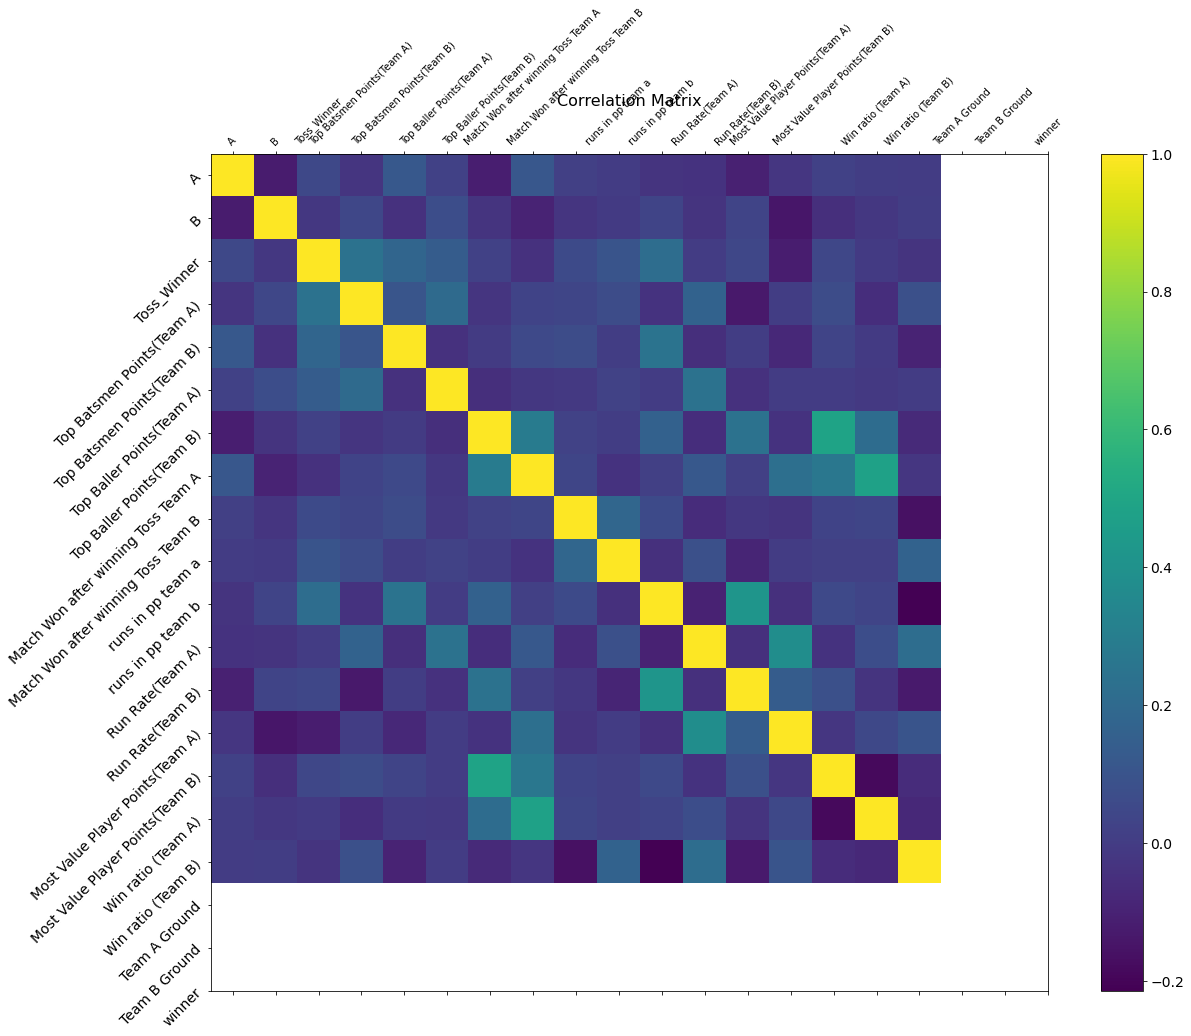

In [132]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(matr, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        data[i]= scaler.fit_transform(pd.DataFrame(data[i])) 
Normalization(["Top Batsmen Points(Team A)","Top Batsmen Points(Team B)","Top Baller Points(Team A)","Top Baller Points(Team B)","runs in pp team a","runs in pp team b","Most Value Player Points(Team A)","Most Value Player Points(Team B)"])

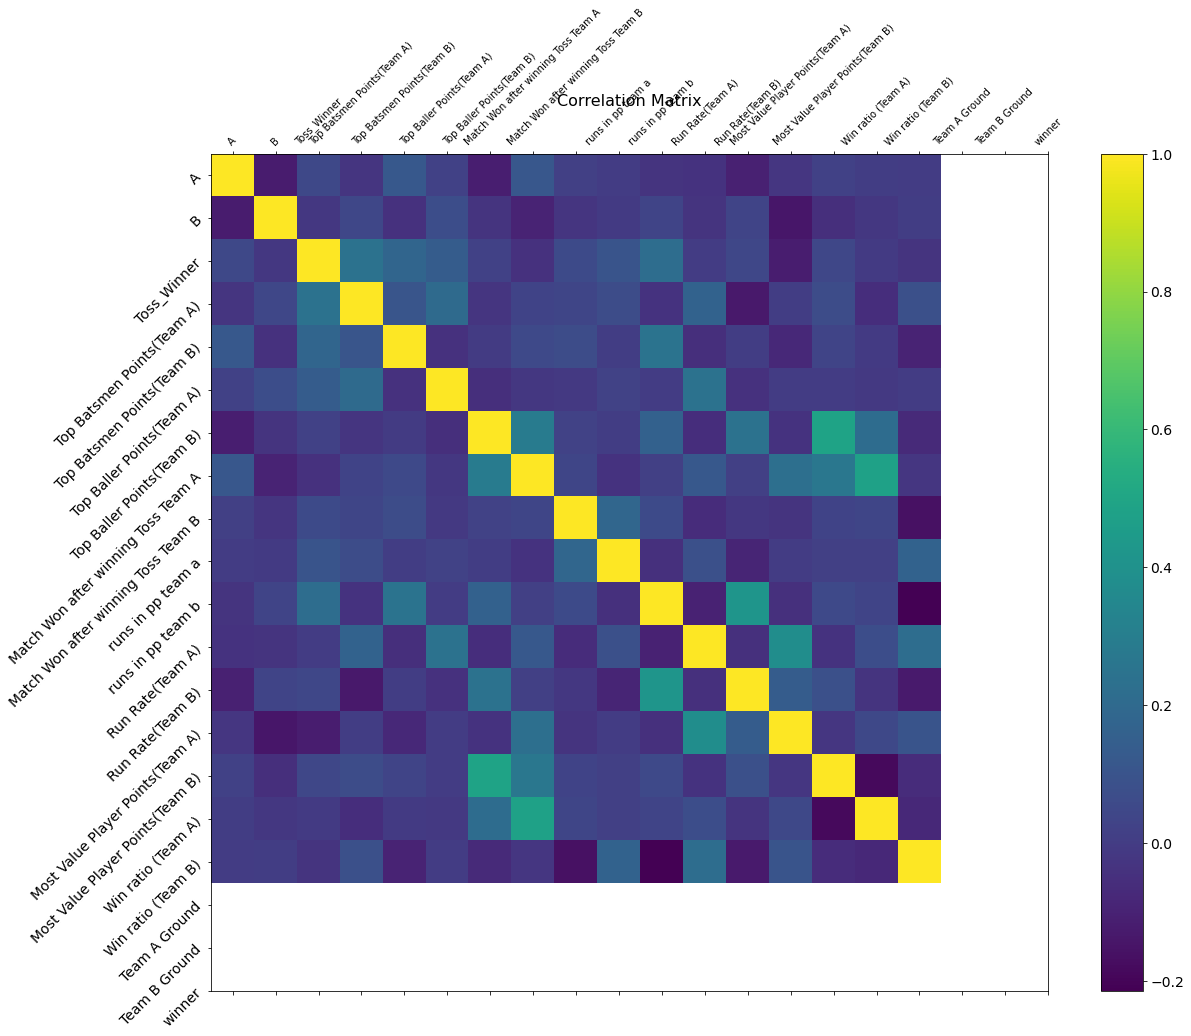

In [134]:
f = plt.figure(figsize=(19, 15))
plt.matshow(matr, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [135]:
x_regre = ['A', 'B', 'Toss_Winner', 'Top Batsmen Points(Team A)', 'Top Batsmen Points(Team B)', 'Top Baller Points(Team A)', 'Top Baller Points(Team B)', 'Match Won after winning Toss Team A', 'Match Won after winning Toss Team B', 'Run Rate(Team A)', 'Run Rate(Team B)', 'Most Value Player Points(Team A)', 'Most Value Player Points(Team B)', 'Win ratio (Team A)', 'Win ratio (Team B)', 'Team A Ground', 'Team B Ground']
x_classi = ['A', 'B', 'Toss_Winner', 'Top Batsmen Points(Team A)', 'Top Batsmen Points(Team B)', 'Top Baller Points(Team A)', 'Top Baller Points(Team B)', 'Match Won after winning Toss Team A', 'Match Won after winning Toss Team B', 'Run Rate(Team A)', 'Run Rate(Team B)', 'Most Value Player Points(Team A)', 'Most Value Player Points(Team B)', 'Win ratio (Team A)', 'Win ratio (Team B)', 'Team A Ground', 'Team B Ground', 'runs in pp team a', 'runs in pp team b']
x_regre_data = data[x_regre]
x_classi_data = data[x_classi]
y_regre = ['runs in pp team a', 'runs in pp team b']
y_classi = ['winner']
y_regre_data = data[y_regre]
y_classi_data = data[y_classi]
print(x_regre_data.shape)
print(y_regre_data.shape)
print(x_classi_data.shape)
print(y_classi_data.shape)

(756, 17)
(756, 2)
(756, 19)
(756, 1)


In [136]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier



## how encoder has encoded  
### CSK = 0
### DC = 1
### DEC = 2
### GL  = 3
### KKR = 4
### KTK = 5
### KXIP = 6
### MI = 7
### PWI = 8
### RCB = 9
### RPS = 10
### RR = 11
### SRH = 12


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x_classi_data, y_classi_data, test_size=0.25)

In [140]:
model1 = LogisticRegression(random_state=1)
model2 = RandomForestClassifier(n_estimators=50, random_state=1)
model3 = GaussianNB()
model4 = SVC(kernel='linear', probability=True)

eclf = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('gnb', model3)], voting='hard')

In [141]:
for model, label in zip([model1, model2, model3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes','Ensemble']):
...     scores = cross_val_score(model, x_classi_data, y_classi_data, scoring='accuracy', cv=5)
...     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Accuracy: 0.66 (+/- 0.04) [Logistic Regression]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Accuracy: 0.65 (+/- 0.04) [Random Forest]
Accuracy: 0.65 (+/- 0.05) [naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

Accuracy: 0.67 (+/- 0.04) [Ensemble]


Predictions

In [142]:
test_data_norm = pd.read_csv("normalized_2020.csv")

In [143]:
test_data_norm = test_data_norm.drop("Unnamed: 0", axis=1)
test_data_norm.set_index("A", inplace=False)

,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground
A,,,,,,,,,,,,,,,,,,
7,0,1,0.990719,0.334107,0.254642,0.806366,0.571429,0.640449,0.181818,0.783333,0.507,0.361,0.719586,1.000000,0.61,0.39,1,0
1,6,1,0.828306,0.273782,0.828912,0.000000,0.466667,0.432099,0.863636,0.866667,-0.230,-0.260,0.000000,0.299697,0.41,0.59,1,0
12,9,1,1.000000,0.354988,1.000000,0.855438,0.500000,0.506173,0.681818,0.783333,0.486,-0.589,0.955790,0.748328,0.57,0.43,1,0
11,0,0,0.357309,0.334107,0.614058,0.806366,0.525000,0.640449,0.318182,0.766667,-0.093,0.361,0.424958,1.000000,0.33,0.67,1,0
4,7,1,0.000000,0.990719,0.616711,0.254642,0.576087,0.571429,0.181818,0.750000,0.600,0.507,0.539036,0.719586,0.24,0.76,1,0
6,9,1,0.273782,0.354988,0.000000,0.855438,0.432099,0.506173,0.409091,0.800000,-0.260,-0.589,0.299697,0.748328,0.50,0.50,1,0
0,1,0,0.334107,0.828306,0.806366,0.828912,0.640449,0.466667,0.272727,0.800000,0.361,-0.230,1.000000,0.000000,0.67,0.33,1,0
4,12,0,0.000000,1.000000,0.616711,1.000000,0.576087,0.500000,0.363636,0.816667,0.600,0.486,0.539036,0.955790,0.59,0.41,1,0
11,6,0,0.357309,0.273782,0.614058,0.000000,0.525000,0.432099,0.545455,0.750000,-0.093,-0.260,0.424958,0.299697,0.43,0.47,1,0


In [144]:
eclf = eclf.fit(x_classi_data, y_classi_data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [145]:
predictions = eclf.predict(test_data_norm)

In [146]:
result_set = pd.read_csv("final_2020.csv")

In [147]:
result_set['winner'] = predictions
result_set.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,0
1,DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,0
2,SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,0
3,RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,0
4,KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,0


In [148]:
result_set.winner[result_set['winner'] == 1] = result_set['team A']
result_set.winner[result_set['winner'] == 0] = result_set['team B']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
result_set.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,CSK
1,DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,KXIP
2,SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,RCB
3,RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,CSK
4,KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,MI


In [150]:
points_table = pd.DataFrame()

In [151]:
points_table['teams'] = ['CSK', 'DC', 'MI', 'SRH', 'KKR', 'KXIP', 'RCB', 'RR']

In [152]:
points_table['points'] = 0
points_table.set_index('teams', inplace=False)
result_set.set_index('team A', inplace=False)

,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
team A,,,,,,,,,,,,,,,,,,,
MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,CSK
DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,KXIP
SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,RCB
RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,CSK
KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,MI
KXIP,RCB,RCB,607.0,614.0,525.0,654.0,0.432099,0.506173,47,48,-0.260,-0.589,629.875000,701.416667,0.50,0.50,home,away,RCB
CSK,DC,CSK,612.2,654.8,646.6,650.0,0.640449,0.466667,44,48,0.361,-0.230,741.550000,582.083333,0.67,0.33,home,away,DC
KKR,SRH,KKR,583.4,669.6,618.0,675.8,0.576087,0.500000,46,49,0.600,0.486,668.041667,734.500000,0.59,0.41,home,away,SRH
RR,KXIP,RR,614.2,607.0,617.6,525.0,0.525000,0.432099,50,45,-0.093,-0.260,649.850000,629.875000,0.43,0.47,home,away,KXIP
